In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import Delaunay
from collections import defaultdict
from itertools import permutations
from scipy.spatial import distance

# Same intital Conditions

In [2]:
# Define path where the angents.dat files are stored. These files are from the last time step.
path = '/Users/surajsahu/Documents/Vasculogensis/Simulation/TDA/same_initial/';

filename1 = '1.dat' ;
filename2 = '2.dat'
filename3 = '3.dat'
filename4 = '4.dat' ;
filename5 = '5.dat'

# Read file into dataframe
df1 = pd.read_csv(path + filename1, sep="\s+",header = None,usecols=[0,1])
df2 = pd.read_csv(path + filename2, sep="\s+",header = None,usecols=[0,1])
df3 = pd.read_csv(path + filename3, sep="\s+",header = None,usecols=[0,1])
df4 = pd.read_csv(path + filename4, sep="\s+",header = None,usecols=[0,1])
df5 = pd.read_csv(path + filename5, sep="\s+",header = None,usecols=[0,1])


# The first two columns of the data frame are the x and y values of each point
points1 = df1[[0,1]].to_numpy()
points2 = df2[[0,1]].to_numpy()
points3 = df3[[0,1]].to_numpy()
points4 = df4[[0,1]].to_numpy()
points5 = df5[[0,1]].to_numpy()

# Now I will make the Delaunay Triangulation
tri1 = Delaunay(points1)
tri2 = Delaunay(points2)
tri3 = Delaunay(points3)
tri4 = Delaunay(points4)
tri5 = Delaunay(points5)

In [3]:
# Read file into dataframe
nf1 = np.loadtxt(path + filename1, skiprows=1,usecols=(2,3))
nf1[:,1] *= -1;
df1 = pd.DataFrame(nf1, columns = ['X','Y'])

nf2 = np.loadtxt(path + filename2, skiprows=1,usecols=(2,3))
nf2[:,1] *= -1;
df2 = pd.DataFrame(nf2, columns = ['X','Y'])

nf3 = np.loadtxt(path + filename3, skiprows=1,usecols=(2,3))
nf3[:,1] *= -1;
df3 = pd.DataFrame(nf3, columns = ['X','Y'])

nf4 = np.loadtxt(path + filename4, skiprows=1,usecols=(1,2))
nf4[:,1] *= -1;
df4 = pd.DataFrame(nf4, columns = ['X','Y'])

nf5 = np.loadtxt(path + filename5, skiprows=1,usecols=(1,2))
nf5[:,1] *= -1;
df5 = pd.DataFrame(nf5, columns = ['X','Y'])
# The first two columns of the data frame are the x and y values of each point
points1 = df1.to_numpy()
points2 = df2.to_numpy()
points3 = df3.to_numpy()
points4 = df4.to_numpy()
points5 = df5.to_numpy()

In [4]:
#Now I will use this triangulation to define nodes and edges of a graph
#finding all the neighbors of each vertex

_neighbors1 = defaultdict(set)
for simplex in tri1.vertices:
    for i, j in permutations(simplex, 2):
        _neighbors1[i].add(j)
#list those neighbors via their index
points1 = [tuple(p) for p in tri1.points]
neighbors1 = {}
for k, v in _neighbors1.items():
    neighbors1[k] = [i for i in v]

_neighbors2 = defaultdict(set)
for simplex in tri2.vertices:
    for i, j in permutations(simplex, 2):
        _neighbors2[i].add(j)
#list those neighbors via their index
points2 = [tuple(p) for p in tri2.points]
neighbors2 = {}
for k, v in _neighbors2.items():
    neighbors2[k] = [i for i in v]

_neighbors3 = defaultdict(set)
for simplex in tri3.vertices:
    for i, j in permutations(simplex, 2):
        _neighbors3[i].add(j)
#list those neighbors via their index
points3 = [tuple(p) for p in tri3.points]
neighbors3 = {}
for k, v in _neighbors3.items():
    neighbors3[k] = [i for i in v]

_neighbors4 = defaultdict(set)
for simplex in tri4.vertices:
    for i, j in permutations(simplex, 2):
        _neighbors4[i].add(j)
#list those neighbors via their index
points4 = [tuple(p) for p in tri4.points]
neighbors4 = {}
for k, v in _neighbors4.items():
    neighbors4[k] = [i for i in v]


_neighbors5 = defaultdict(set)
for simplex in tri5.vertices:
    for i, j in permutations(simplex, 2):
        _neighbors5[i].add(j)
#list those neighbors via their index
points5 = [tuple(p) for p in tri5.points]
neighbors5 = {}
for k, v in _neighbors5.items():
    neighbors5[k] = [i for i in v]

In [5]:
# First I add all the points to the graph
G1 = nx.Graph()
for i in range(len(points1)):
  G1.add_node(i)
#print('G1 num nodes: ' + str(G1.number_of_nodes()))

G2 = nx.Graph()
for i in range(len(points2)):
  G2.add_node(i)
#print('G2 num nodes: ' + str(G2.number_of_nodes()))

G3 = nx.Graph()
for i in range(len(points3)):
  G3.add_node(i)
#print('G3 num nodes: ' + str(G3.number_of_nodes()))

G4 = nx.Graph()
for i in range(len(points4)):
  G4.add_node(i)
#print('G4 num nodes: ' + str(G4.number_of_nodes()))

G5 = nx.Graph()
for i in range(len(points5)):
  G5.add_node(i)
#print('G5 num nodes: ' + str(G5.number_of_nodes()))

In [6]:
# Now I will only keep edges within a certain distance
G1.remove_edges_from(G1.edges())
for k in neighbors1:
    node1 = k
    for j in neighbors1[k]:
      node2 = j
      if distance.euclidean(points1[node1],points1[node2]) < 4:
        G1.add_edge(node1,node2)
print('G1 num edges: ' + str(G1.number_of_edges()))

G2.remove_edges_from(G2.edges())
for k in neighbors2:
    node1 = k
    for j in neighbors2[k]:
      node2 = j
      if distance.euclidean(points2[node1],points2[node2]) < 4:
        G2.add_edge(node1,node2)
print('G2 num edges: ' + str(G2.number_of_edges()))

G3.remove_edges_from(G3.edges())
for k in neighbors3:
    node1 = k
    for j in neighbors3[k]:
      node2 = j
      if distance.euclidean(points3[node1],points3[node2]) < 4:
        G3.add_edge(node1,node2)
print('G3 num edges: ' + str(G3.number_of_edges()))

G4.remove_edges_from(G4.edges())
for k in neighbors4:
    node1 = k
    for j in neighbors4[k]:
      node2 = j
      if distance.euclidean(points4[node1],points4[node2]) < 4:
        G4.add_edge(node1,node2)
print('G4 num edges: ' + str(G4.number_of_edges()))

G5.remove_edges_from(G5.edges())
for k in neighbors5:
    node1 = k
    for j in neighbors5[k]:
      node2 = j
      if distance.euclidean(points5[node1],points5[node2]) < 4:
        G5.add_edge(node1,node2)
print('G5 num edges: ' + str(G5.number_of_edges()))

G1 num edges: 171
G2 num edges: 174
G3 num edges: 170
G4 num edges: 170
G5 num edges: 173


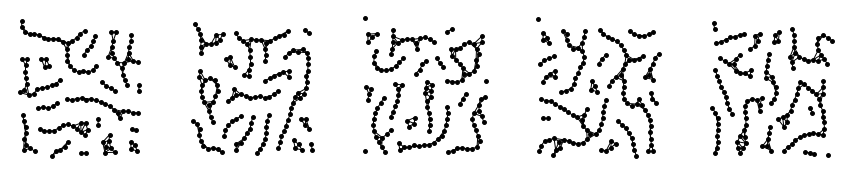

In [7]:
# plot the new result
pos1 = {}
for k in neighbors1:
    v = points1[k]
    pos1[k] = [i for i in v]

pos2= {}
for k in neighbors2:
    v = points2[k]
    pos2[k] = [i for i in v]

pos3 = {}
for k in neighbors3:
    v = points3[k]
    pos3[k] = [i for i in v]

pos4 = {}
for k in neighbors4:
    v = points4[k]
    pos4[k] = [i for i in v]

pos5 = {}
for k in neighbors5:
    v = points5[k]
    pos5[k] = [i for i in v]

fig, axs = plt.subplots(1, 5, figsize=(15, 3), sharey=True)
nx.draw(G1, pos=pos1, node_color='k', node_size = 15, ax=axs[0])
nx.draw(G2, pos=pos2, node_color='k', node_size = 15, ax=axs[1])
nx.draw(G3, pos=pos3, node_color='k', node_size = 15, ax=axs[2])
nx.draw(G4, pos=pos4, node_color='k', node_size = 15, ax=axs[3])
nx.draw(G5, pos=pos5,node_color='k', node_size = 15, ax=axs[4])

## Average neighbor degree

2.599537037037037
2.6222222222222222
2.6009259259259263
2.573611111111111
2.6128472222222223


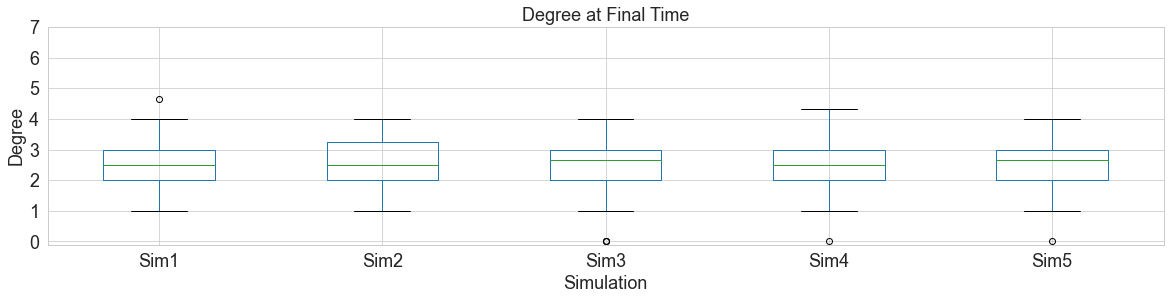

In [8]:
# Now we can do some graph metrics
my_dict1 = nx.average_neighbor_degree(G1)
my_dict2 = nx.average_neighbor_degree(G2)
my_dict3 = nx.average_neighbor_degree(G3)
my_dict4 = nx.average_neighbor_degree(G4)
my_dict5 = nx.average_neighbor_degree(G5)
print(np.array(list(my_dict1.values())).mean())
print(np.array(list(my_dict2.values())).mean())
print(np.array(list(my_dict3.values())).mean())
print(np.array(list(my_dict4.values())).mean())
print(np.array(list(my_dict5.values())).mean())

df1 = pd.DataFrame.from_dict(my_dict1,orient='index',columns = ['Sim1'])
df2 = pd.DataFrame.from_dict(my_dict2,orient='index',columns = ['Sim2'])
df3 = pd.DataFrame.from_dict(my_dict3,orient='index',columns = ['Sim3'])
df4 = pd.DataFrame.from_dict(my_dict4,orient='index',columns = ['Sim4'])
df5 = pd.DataFrame.from_dict(my_dict5,orient='index',columns = ['Sim5'])

frames = [df1, df2, df3, df4, df5]
df_all = pd.concat(frames)

#seaborn setting
sns.set_style("whitegrid",rc = {"grid.linewidth": 0.1,'font.family': ['sans-serif'],'font.sans-serif': ['Arial']})
sns.set_context("paper", font_scale=1) 
plt.figure(figsize=(20,4))

flierprops = dict(marker = 'o', markersize=1,linestyle='none')

boxplot = df_all.boxplot(column = ['Sim1','Sim2','Sim3', 'Sim4', 'Sim5'])

plt.xticks(fontsize = 18)
boxplot.set(ylim=(-.1,7))
boxplot.set_ylabel('Degree',fontsize = 18)
boxplot.set_xlabel('Simulation',fontsize = 18)
plt.yticks(fontsize = 18)
boxplot.set_title("Degree at Final Time",fontsize = 18)
plt.show()

## Density

$\frac{2m}{n(n-1)}$ where $n$ is the number of nodes and $m$ is the number of edges.  The density is $0$ for a graph without edges and $1$ for a complete graph. The density can be higher than 1 if there are loops.

In [9]:
# Now we can do some graph metrics
my_dict1 = nx.density(G1)
print('G1 has density: ' + str(my_dict1))
my_dict2 = nx.density(G2)
print('G2 has density: ' + str(my_dict2))
my_dict3 = nx.density(G3)
print('G3 has density: ' + str(my_dict3))
my_dict4 = nx.density(G4)
print('G4 has density: ' + str(my_dict4))
my_dict5 = nx.density(G5)
print('G5 has density: ' + str(my_dict5))

G1 has density: 0.016608391608391608
G2 has density: 0.0168997668997669
G3 has density: 0.016511266511266512
G4 has density: 0.016511266511266512
G5 has density: 0.016802641802641804


## Clustering



https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.approximation.clustering_coefficient.average_clustering.html#networkx.algorithms.approximation.clustering_coefficient.average_clustering

In [10]:
# Clustering
my_dict1 = nx.average_clustering(G1)
print('G1 has Clustering Coeff: ' + str(my_dict1))
my_dict2 = nx.average_clustering(G2)
print('G2 has Clustering Coeff: ' + str(my_dict2))
my_dict3 = nx.average_clustering(G3)
print('G3 has Clustering Coeff: ' + str(my_dict3))
my_dict4 = nx.average_clustering(G4)
print('G4 has Clustering Coeff: ' + str(my_dict4))
my_dict5 = nx.average_clustering(G5)
print('G5 has Clustering Coeff: ' + str(my_dict5))

G1 has Clustering Coeff: 0.35000000000000014
G2 has Clustering Coeff: 0.3768518518518518
G3 has Clustering Coeff: 0.33287037037037037
G4 has Clustering Coeff: 0.3462962962962964
G5 has Clustering Coeff: 0.33101851851851855


Matching Index: https://www.frontiersin.org/articles/10.3389/fbioe.2020.00034/full
Need to code this one.

## The **degree centrality** for a node v is the fraction of nodes it is connected to.

0.016608391608391608
0.016899766899766896
0.016511266511266512
0.016511266511266515
0.016802641802641804


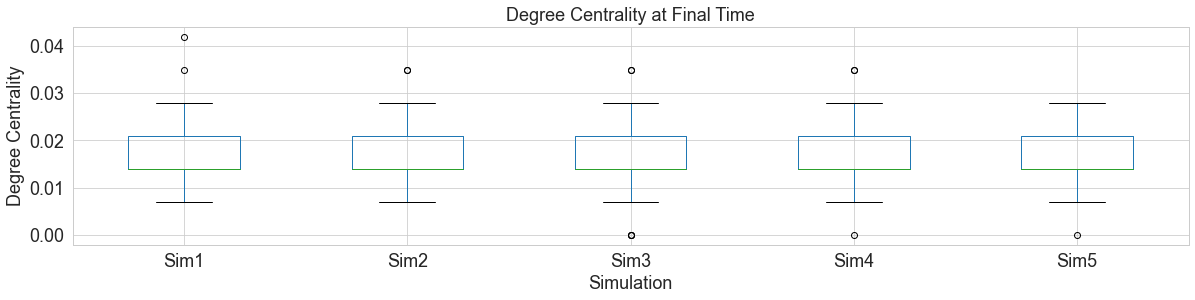

In [11]:
# Now we can do some graph metrics
my_dict1 = nx.degree_centrality(G1)
my_dict2 = nx.degree_centrality(G2)
my_dict3 = nx.degree_centrality(G3)
my_dict4 = nx.degree_centrality(G4)
my_dict5 = nx.degree_centrality(G5)
print(np.array(list(my_dict1.values())).mean())
print(np.array(list(my_dict2.values())).mean())
print(np.array(list(my_dict3.values())).mean())
print(np.array(list(my_dict4.values())).mean())
print(np.array(list(my_dict5.values())).mean())


df1 = pd.DataFrame.from_dict(my_dict1,orient='index',columns = ['Sim1'])
df2 = pd.DataFrame.from_dict(my_dict2,orient='index',columns = ['Sim2'])
df3 = pd.DataFrame.from_dict(my_dict3,orient='index',columns = ['Sim3'])
df4 = pd.DataFrame.from_dict(my_dict4,orient='index',columns = ['Sim4'])
df5 = pd.DataFrame.from_dict(my_dict5,orient='index',columns = ['Sim5'])
frames = [df1, df2, df3, df4, df5]
df_all = pd.concat(frames)

#seaborn setting
sns.set_style("whitegrid",rc = {"grid.linewidth": 0.1,'font.family': ['sans-serif'],'font.sans-serif': ['Arial']})
sns.set_context("paper", font_scale=1) 
plt.figure(figsize=(20,4))

flierprops = dict(marker = 'o', markersize=1,linestyle='none')
boxplot = df_all.boxplot(column = ['Sim1','Sim2','Sim3', 'Sim4', 'Sim5'])

plt.xticks(fontsize = 18)
boxplot.set_ylabel('Degree Centrality',fontsize = 18)
boxplot.set_xlabel('Simulation',fontsize = 18)
plt.yticks(fontsize = 18)
boxplot.set_title("Degree Centrality at Final Time",fontsize = 18)
plt.show()

## The **closeness centrality** for a node v is a measure to detect important nodes which can communicate quickly with other nodes in a network.


https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality


0.025033886035194595
0.02536974790071993
0.024944063842696557
0.026844811258843436
0.024779798403100222


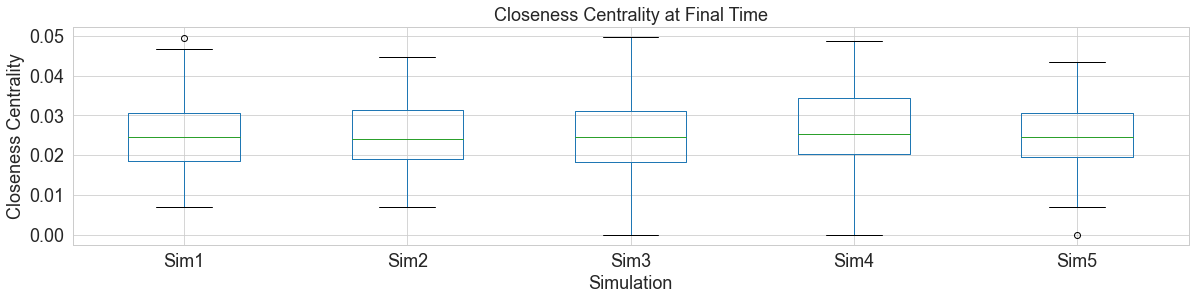

In [12]:
# Now we can do some graph metrics
my_dict1 = nx.closeness_centrality(G1)
my_dict2 = nx.closeness_centrality(G2)
my_dict3 = nx.closeness_centrality(G3)
my_dict4 = nx.closeness_centrality(G4)
my_dict5 = nx.closeness_centrality(G5)
print(np.array(list(my_dict1.values())).mean())
print(np.array(list(my_dict2.values())).mean())
print(np.array(list(my_dict3.values())).mean())
print(np.array(list(my_dict4.values())).mean())
print(np.array(list(my_dict5.values())).mean())

df1 = pd.DataFrame.from_dict(my_dict1,orient='index',columns = ['Sim1'])
df2 = pd.DataFrame.from_dict(my_dict2,orient='index',columns = ['Sim2'])
df3 = pd.DataFrame.from_dict(my_dict3,orient='index',columns = ['Sim3'])
df4 = pd.DataFrame.from_dict(my_dict4,orient='index',columns = ['Sim4'])
df5 = pd.DataFrame.from_dict(my_dict5,orient='index',columns = ['Sim5'])
frames = [df1, df2, df3, df4, df5]
df_all = pd.concat(frames)

#seaborn setting
sns.set_style("whitegrid",rc = {"grid.linewidth": 0.1,'font.family': ['sans-serif'],'font.sans-serif': ['Arial']})
sns.set_context("paper", font_scale=1) 
plt.figure(figsize=(20,4))
flierprops = dict(marker = 'o', markersize=1,linestyle='none')
boxplot = df_all.boxplot(column = ['Sim1','Sim2','Sim3', 'Sim4', 'Sim5'])
plt.xticks(fontsize = 18)
boxplot.set_ylabel('Closeness Centrality',fontsize = 18)
boxplot.set_xlabel('Simulation',fontsize = 18)
plt.yticks(fontsize = 18)
boxplot.set_title("Closeness Centrality at Final Time",fontsize = 18)
plt.show()

### The **betweenness centrality** for a node v shows the nodes which form such bridges so that two communities can communicate with each other. 

**Betweenness centrality (BC) ** measures the frequency of a particular node (cell) being traversed if the shortest paths between all pairs of cells are traveled (Brandes, 2001). In tangible terms, BC models the direct transport of information given prior knowledge of the fastest route to the destination.

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality

0.00233852610613174
0.002363833349748843
0.0018405889884763127
0.002363833349748843
0.0018405889884763127


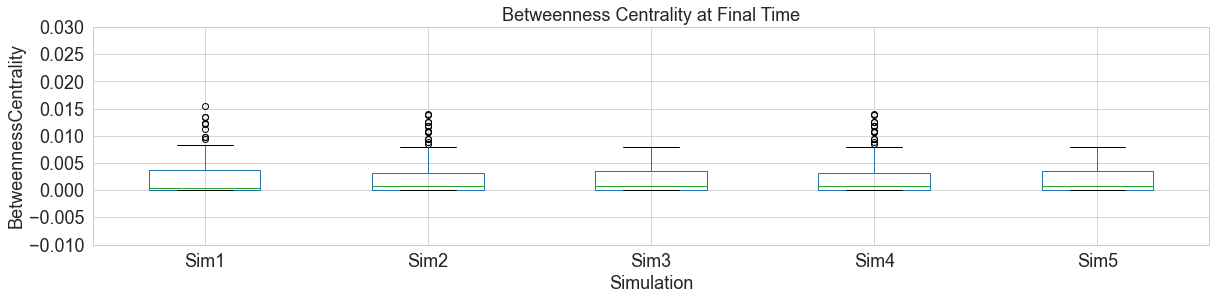

In [13]:
# Now we can do some graph metrics
my_dict1 = nx.betweenness_centrality(G1)
my_dict2 = nx.betweenness_centrality(G2)
my_dict3 = nx.betweenness_centrality(G3)
my_dict4 = nx.betweenness_centrality(G2)
my_dict5 = nx.betweenness_centrality(G3)
print(np.array(list(my_dict1.values())).mean())
print(np.array(list(my_dict2.values())).mean())
print(np.array(list(my_dict3.values())).mean())
print(np.array(list(my_dict4.values())).mean())
print(np.array(list(my_dict5.values())).mean())

df1 = pd.DataFrame.from_dict(my_dict1,orient='index',columns = ['Sim1'])
df2 = pd.DataFrame.from_dict(my_dict2,orient='index',columns = ['Sim2'])
df3 = pd.DataFrame.from_dict(my_dict3,orient='index',columns = ['Sim3'])
df4 = pd.DataFrame.from_dict(my_dict4,orient='index',columns = ['Sim4'])
df5 = pd.DataFrame.from_dict(my_dict5,orient='index',columns = ['Sim5'])
frames = [df1, df2, df3, df4, df5]
df_all = pd.concat(frames)

#seaborn setting
sns.set_style("whitegrid",rc = {"grid.linewidth": 0.1,'font.family': ['sans-serif'],'font.sans-serif': ['Arial']})
sns.set_context("paper", font_scale=1) 
plt.figure(figsize=(20,4))
flierprops = dict(marker = 'o', markersize=1,linestyle='none')
boxplot = df_all.boxplot(column = ['Sim1','Sim2','Sim3', 'Sim4', 'Sim5'])
plt.xticks(fontsize = 18)
boxplot.set(ylim=(-.01,.03))
boxplot.set_ylabel('BetweennessCentrality',fontsize = 18)
boxplot.set_xlabel('Simulation',fontsize = 18)
plt.yticks(fontsize = 18)
boxplot.set_title("Betweenness Centrality at Final Time",fontsize = 18)
plt.show()

# Angle



In [14]:
# Define path where the angents.dat files are stored. These files are from the last time step.
path = '/Users/surajsahu/Documents/Vasculogensis/Simulation/TDA/angle/';

filename1 = '2.dat' ;
filename2 = '3.dat'
filename3 = '4.dat'
filename4 = '6.dat' ;
filename5 = '12.dat'

# Read file into dataframe
df1 = pd.read_csv(path + filename1, sep="\s+",header = None,usecols=[0,1])
df2 = pd.read_csv(path + filename2, sep="\s+",header = None,usecols=[0,1])
df3 = pd.read_csv(path + filename3, sep="\s+",header = None,usecols=[0,1])
df4 = pd.read_csv(path + filename4, sep="\s+",header = None,usecols=[0,1])
df5 = pd.read_csv(path + filename5, sep="\s+",header = None,usecols=[0,1])


# The first two columns of the data frame are the x and y values of each point
points1 = df1[[0,1]].to_numpy()
points2 = df2[[0,1]].to_numpy()
points3 = df3[[0,1]].to_numpy()
points4 = df4[[0,1]].to_numpy()
points5 = df5[[0,1]].to_numpy()

# Now I will make the Delaunay Triangulation
tri1 = Delaunay(points1)
tri2 = Delaunay(points2)
tri3 = Delaunay(points3)
tri4 = Delaunay(points4)
tri5 = Delaunay(points5)

In [15]:
# Read file into dataframe
nf1 = np.loadtxt(path + filename1, skiprows=1,usecols=(2,3))
nf1[:,1] *= -1;
df1 = pd.DataFrame(nf1, columns = ['X','Y'])

nf2 = np.loadtxt(path + filename2, skiprows=1,usecols=(2,3))
nf2[:,1] *= -1;
df2 = pd.DataFrame(nf2, columns = ['X','Y'])

nf3 = np.loadtxt(path + filename3, skiprows=1,usecols=(2,3))
nf3[:,1] *= -1;
df3 = pd.DataFrame(nf3, columns = ['X','Y'])

nf4 = np.loadtxt(path + filename4, skiprows=1,usecols=(1,2))
nf4[:,1] *= -1;
df4 = pd.DataFrame(nf4, columns = ['X','Y'])

nf5 = np.loadtxt(path + filename5, skiprows=1,usecols=(1,2))
nf5[:,1] *= -1;
df5 = pd.DataFrame(nf5, columns = ['X','Y'])
# The first two columns of the data frame are the x and y values of each point
points1 = df1.to_numpy()
points2 = df2.to_numpy()
points3 = df3.to_numpy()
points4 = df4.to_numpy()
points5 = df5.to_numpy()

In [16]:
#Now I will use this triangulation to define nodes and edges of a graph
#finding all the neighbors of each vertex

_neighbors1 = defaultdict(set)
for simplex in tri1.vertices:
    for i, j in permutations(simplex, 2):
        _neighbors1[i].add(j)
#list those neighbors via their index
points1 = [tuple(p) for p in tri1.points]
neighbors1 = {}
for k, v in _neighbors1.items():
    neighbors1[k] = [i for i in v]

_neighbors2 = defaultdict(set)
for simplex in tri2.vertices:
    for i, j in permutations(simplex, 2):
        _neighbors2[i].add(j)
#list those neighbors via their index
points2 = [tuple(p) for p in tri2.points]
neighbors2 = {}
for k, v in _neighbors2.items():
    neighbors2[k] = [i for i in v]

_neighbors3 = defaultdict(set)
for simplex in tri3.vertices:
    for i, j in permutations(simplex, 2):
        _neighbors3[i].add(j)
#list those neighbors via their index
points3 = [tuple(p) for p in tri3.points]
neighbors3 = {}
for k, v in _neighbors3.items():
    neighbors3[k] = [i for i in v]

_neighbors4 = defaultdict(set)
for simplex in tri4.vertices:
    for i, j in permutations(simplex, 2):
        _neighbors4[i].add(j)
#list those neighbors via their index
points4 = [tuple(p) for p in tri4.points]
neighbors4 = {}
for k, v in _neighbors4.items():
    neighbors4[k] = [i for i in v]


_neighbors5 = defaultdict(set)
for simplex in tri5.vertices:
    for i, j in permutations(simplex, 2):
        _neighbors5[i].add(j)
#list those neighbors via their index
points5 = [tuple(p) for p in tri5.points]
neighbors5 = {}
for k, v in _neighbors5.items():
    neighbors5[k] = [i for i in v]

In [17]:
# First I add all the points to the graph
G1 = nx.Graph()
for i in range(len(points1)):
  G1.add_node(i)
#print('G1 num nodes: ' + str(G1.number_of_nodes()))

G2 = nx.Graph()
for i in range(len(points2)):
  G2.add_node(i)
#print('G2 num nodes: ' + str(G2.number_of_nodes()))

G3 = nx.Graph()
for i in range(len(points3)):
  G3.add_node(i)
#print('G3 num nodes: ' + str(G3.number_of_nodes()))

G4 = nx.Graph()
for i in range(len(points4)):
  G4.add_node(i)
#print('G4 num nodes: ' + str(G4.number_of_nodes()))

G5 = nx.Graph()
for i in range(len(points5)):
  G5.add_node(i)
#print('G5 num nodes: ' + str(G5.number_of_nodes()))

In [18]:
# Now I will only keep edges within a certain distance
G1.remove_edges_from(G1.edges())
for k in neighbors1:
    node1 = k
    for j in neighbors1[k]:
      node2 = j
      if distance.euclidean(points1[node1],points1[node2]) < 4:
        G1.add_edge(node1,node2)
print('G1 num edges: ' + str(G1.number_of_edges()))

G2.remove_edges_from(G2.edges())
for k in neighbors2:
    node1 = k
    for j in neighbors2[k]:
      node2 = j
      if distance.euclidean(points2[node1],points2[node2]) < 4:
        G2.add_edge(node1,node2)
print('G2 num edges: ' + str(G2.number_of_edges()))

G3.remove_edges_from(G3.edges())
for k in neighbors3:
    node1 = k
    for j in neighbors3[k]:
      node2 = j
      if distance.euclidean(points3[node1],points3[node2]) < 4:
        G3.add_edge(node1,node2)
print('G3 num edges: ' + str(G3.number_of_edges()))

G4.remove_edges_from(G4.edges())
for k in neighbors4:
    node1 = k
    for j in neighbors4[k]:
      node2 = j
      if distance.euclidean(points4[node1],points4[node2]) < 4:
        G4.add_edge(node1,node2)
print('G4 num edges: ' + str(G4.number_of_edges()))

G5.remove_edges_from(G5.edges())
for k in neighbors5:
    node1 = k
    for j in neighbors5[k]:
      node2 = j
      if distance.euclidean(points5[node1],points5[node2]) < 4:
        G5.add_edge(node1,node2)
print('G5 num edges: ' + str(G5.number_of_edges()))

G1 num edges: 171
G2 num edges: 174
G3 num edges: 183
G4 num edges: 184
G5 num edges: 194


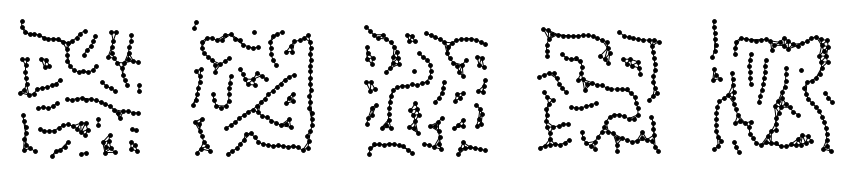

In [19]:
# plot the new result
pos1 = {}
for k in neighbors1:
    v = points1[k]
    pos1[k] = [i for i in v]

pos2= {}
for k in neighbors2:
    v = points2[k]
    pos2[k] = [i for i in v]

pos3 = {}
for k in neighbors3:
    v = points3[k]
    pos3[k] = [i for i in v]

pos4 = {}
for k in neighbors4:
    v = points4[k]
    pos4[k] = [i for i in v]

pos5 = {}
for k in neighbors5:
    v = points5[k]
    pos5[k] = [i for i in v]

fig, axs = plt.subplots(1, 5, figsize=(15, 3), sharey=True)
nx.draw(G1, pos=pos1, node_color='k', node_size = 15, ax=axs[0])
nx.draw(G2, pos=pos2, node_color='k', node_size = 15, ax=axs[1])
nx.draw(G3, pos=pos3, node_color='k', node_size = 15, ax=axs[2])
nx.draw(G4, pos=pos4, node_color='k', node_size = 15, ax=axs[3])
nx.draw(G5, pos=pos5,node_color='k', node_size = 15, ax=axs[4])

## Average neighbor degree

2.599537037037037
2.620486111111111
2.789236111111111
2.8488425925925926
2.9362268518518517


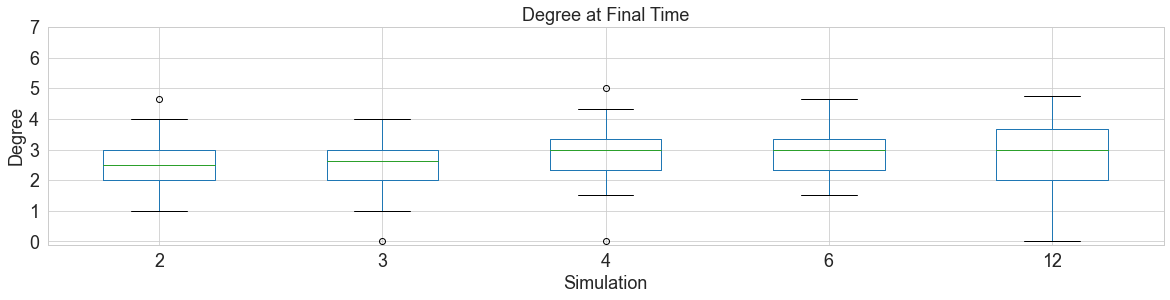

In [20]:
# Now we can do some graph metrics
my_dict1 = nx.average_neighbor_degree(G1)
my_dict2 = nx.average_neighbor_degree(G2)
my_dict3 = nx.average_neighbor_degree(G3)
my_dict4 = nx.average_neighbor_degree(G4)
my_dict5 = nx.average_neighbor_degree(G5)
print(np.array(list(my_dict1.values())).mean())
print(np.array(list(my_dict2.values())).mean())
print(np.array(list(my_dict3.values())).mean())
print(np.array(list(my_dict4.values())).mean())
print(np.array(list(my_dict5.values())).mean())

df1 = pd.DataFrame.from_dict(my_dict1,orient='index',columns = ['2'])
df2 = pd.DataFrame.from_dict(my_dict2,orient='index',columns = ['3'])
df3 = pd.DataFrame.from_dict(my_dict3,orient='index',columns = ['4'])
df4 = pd.DataFrame.from_dict(my_dict4,orient='index',columns = ['6'])
df5 = pd.DataFrame.from_dict(my_dict5,orient='index',columns = ['12'])

frames = [df1, df2, df3, df4, df5]
df_all = pd.concat(frames)

#seaborn setting
sns.set_style("whitegrid",rc = {"grid.linewidth": 0.1,'font.family': ['sans-serif'],'font.sans-serif': ['Arial']})
sns.set_context("paper", font_scale=1) 
plt.figure(figsize=(20,4))

flierprops = dict(marker = 'o', markersize=1,linestyle='none')

boxplot = df_all.boxplot(column = ['2','3','4', '6', '12'])

plt.xticks(fontsize = 18)
boxplot.set(ylim=(-.1,7))
boxplot.set_ylabel('Degree',fontsize = 18)
boxplot.set_xlabel('Angle',fontsize = 18)
plt.yticks(fontsize = 18)
boxplot.set_title("Degree at Final Time",fontsize = 18)
plt.show()

## Density

$\frac{2m}{n(n-1)}$ where $n$ is the number of nodes and $m$ is the number of edges.  The density is $0$ for a graph without edges and $1$ for a complete graph. The density can be higher than 1 if there are loops.

In [21]:
# Now we can do some graph metrics
my_dict1 = nx.density(G1)
print('G1 has density: ' + str(my_dict1))
my_dict2 = nx.density(G2)
print('G2 has density: ' + str(my_dict2))
my_dict3 = nx.density(G3)
print('G3 has density: ' + str(my_dict3))
my_dict4 = nx.density(G4)
print('G4 has density: ' + str(my_dict4))
my_dict5 = nx.density(G5)
print('G5 has density: ' + str(my_dict5))

G1 has density: 0.016608391608391608
G2 has density: 0.0168997668997669
G3 has density: 0.017773892773892772
G4 has density: 0.017871017871017872
G5 has density: 0.018842268842268844


## Clustering



https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.approximation.clustering_coefficient.average_clustering.html#networkx.algorithms.approximation.clustering_coefficient.average_clustering

In [22]:
# Clustering
my_dict1 = nx.average_clustering(G1)
print('G1 has Clustering Coeff: ' + str(my_dict1))
my_dict2 = nx.average_clustering(G2)
print('G2 has Clustering Coeff: ' + str(my_dict2))
my_dict3 = nx.average_clustering(G3)
print('G3 has Clustering Coeff: ' + str(my_dict3))
my_dict4 = nx.average_clustering(G4)
print('G4 has Clustering Coeff: ' + str(my_dict4))
my_dict5 = nx.average_clustering(G5)
print('G5 has Clustering Coeff: ' + str(my_dict5))

G1 has Clustering Coeff: 0.35000000000000014
G2 has Clustering Coeff: 0.37592592592592605
G3 has Clustering Coeff: 0.4671296296296295
G4 has Clustering Coeff: 0.3497685185185184
G5 has Clustering Coeff: 0.34722222222222227


Matching Index: https://www.frontiersin.org/articles/10.3389/fbioe.2020.00034/full
Need to code this one.

## The **degree centrality** for a node v is the fraction of nodes it is connected to.

0.016608391608391608
0.0168997668997669
0.017773892773892776
0.017871017871017872
0.018842268842268844


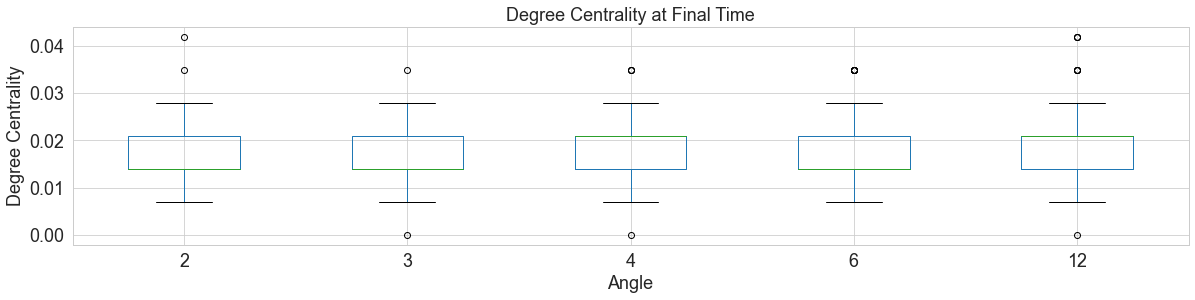

In [28]:
# Now we can do some graph metrics
my_dict1 = nx.degree_centrality(G1)
my_dict2 = nx.degree_centrality(G2)
my_dict3 = nx.degree_centrality(G3)
my_dict4 = nx.degree_centrality(G4)
my_dict5 = nx.degree_centrality(G5)
print(np.array(list(my_dict1.values())).mean())
print(np.array(list(my_dict2.values())).mean())
print(np.array(list(my_dict3.values())).mean())
print(np.array(list(my_dict4.values())).mean())
print(np.array(list(my_dict5.values())).mean())


df1 = pd.DataFrame.from_dict(my_dict1,orient='index',columns = ['2'])
df2 = pd.DataFrame.from_dict(my_dict2,orient='index',columns = ['3'])
df3 = pd.DataFrame.from_dict(my_dict3,orient='index',columns = ['4'])
df4 = pd.DataFrame.from_dict(my_dict4,orient='index',columns = ['6'])
df5 = pd.DataFrame.from_dict(my_dict5,orient='index',columns = ['12'])
frames = [df1, df2, df3, df4, df5]
df_all = pd.concat(frames)

#seaborn setting
sns.set_style("whitegrid",rc = {"grid.linewidth": 0.1,'font.family': ['sans-serif'],'font.sans-serif': ['Arial']})
sns.set_context("paper", font_scale=1) 
plt.figure(figsize=(20,4))

flierprops = dict(marker = 'o', markersize=1,linestyle='none')

boxplot = df_all.boxplot(column = ['2','3','4', '6', '12'])

plt.xticks(fontsize = 18)
boxplot.set_ylabel('Degree Centrality',fontsize = 18)
boxplot.set_xlabel('Angle',fontsize = 18)
plt.yticks(fontsize = 18)
boxplot.set_title("Degree Centrality at Final Time",fontsize = 18)
plt.show()

## The **closeness centrality** for a node v is a measure to detect important nodes which can communicate quickly with other nodes in a network.


https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality


0.025033886035194595
0.026173318059123308
0.024102665659546847
0.02955592825771447
0.03310310925955186


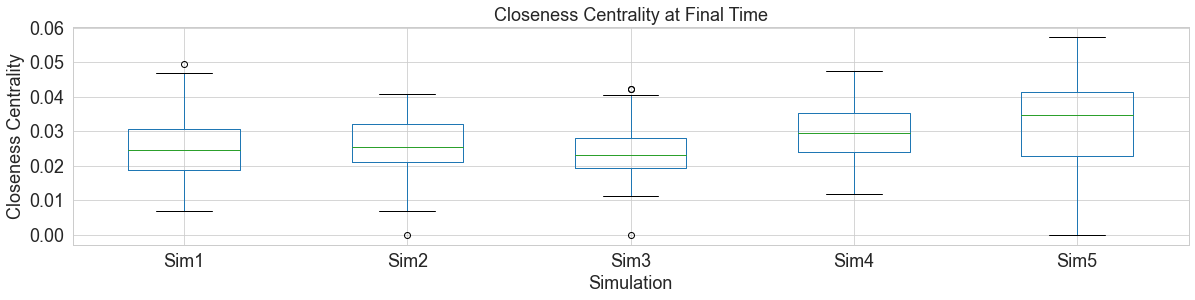

In [24]:
# Now we can do some graph metrics
my_dict1 = nx.closeness_centrality(G1)
my_dict2 = nx.closeness_centrality(G2)
my_dict3 = nx.closeness_centrality(G3)
my_dict4 = nx.closeness_centrality(G4)
my_dict5 = nx.closeness_centrality(G5)
print(np.array(list(my_dict1.values())).mean())
print(np.array(list(my_dict2.values())).mean())
print(np.array(list(my_dict3.values())).mean())
print(np.array(list(my_dict4.values())).mean())
print(np.array(list(my_dict5.values())).mean())

df1 = pd.DataFrame.from_dict(my_dict1,orient='index',columns = ['Sim1'])
df2 = pd.DataFrame.from_dict(my_dict2,orient='index',columns = ['Sim2'])
df3 = pd.DataFrame.from_dict(my_dict3,orient='index',columns = ['Sim3'])
df4 = pd.DataFrame.from_dict(my_dict4,orient='index',columns = ['Sim4'])
df5 = pd.DataFrame.from_dict(my_dict5,orient='index',columns = ['Sim5'])
frames = [df1, df2, df3, df4, df5]
df_all = pd.concat(frames)

#seaborn setting
sns.set_style("whitegrid",rc = {"grid.linewidth": 0.1,'font.family': ['sans-serif'],'font.sans-serif': ['Arial']})
sns.set_context("paper", font_scale=1) 
plt.figure(figsize=(20,4))
flierprops = dict(marker = 'o', markersize=1,linestyle='none')
boxplot = df_all.boxplot(column = ['Sim1','Sim2','Sim3', 'Sim4', 'Sim5'])
plt.xticks(fontsize = 18)
boxplot.set_ylabel('Closeness Centrality',fontsize = 18)
boxplot.set_xlabel('Angle',fontsize = 18)
plt.yticks(fontsize = 18)
boxplot.set_title("Closeness Centrality at Final Time",fontsize = 18)
plt.show()

### The **betweenness centrality** for a node v shows the nodes which form such bridges so that two communities can communicate with each other. 

**Betweenness centrality (BC) ** measures the frequency of a particular node (cell) being traversed if the shortest paths between all pairs of cells are traveled (Brandes, 2001). In tangible terms, BC models the direct transport of information given prior knowledge of the fastest route to the destination.

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality

0.00233852610613174
0.008139356730906025
0.001995852347965024
0.008139356730906025
0.001995852347965024


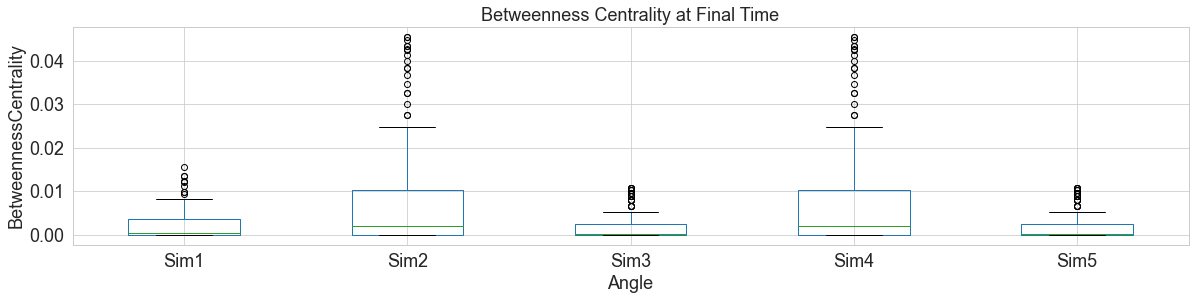

In [27]:
# Now we can do some graph metrics
my_dict1 = nx.betweenness_centrality(G1)
my_dict2 = nx.betweenness_centrality(G2)
my_dict3 = nx.betweenness_centrality(G3)
my_dict4 = nx.betweenness_centrality(G2)
my_dict5 = nx.betweenness_centrality(G3)
print(np.array(list(my_dict1.values())).mean())
print(np.array(list(my_dict2.values())).mean())
print(np.array(list(my_dict3.values())).mean())
print(np.array(list(my_dict4.values())).mean())
print(np.array(list(my_dict5.values())).mean())

df1 = pd.DataFrame.from_dict(my_dict1,orient='index',columns = ['Sim1'])
df2 = pd.DataFrame.from_dict(my_dict2,orient='index',columns = ['Sim2'])
df3 = pd.DataFrame.from_dict(my_dict3,orient='index',columns = ['Sim3'])
df4 = pd.DataFrame.from_dict(my_dict4,orient='index',columns = ['Sim4'])
df5 = pd.DataFrame.from_dict(my_dict5,orient='index',columns = ['Sim5'])
frames = [df1, df2, df3, df4, df5]
df_all = pd.concat(frames)

#seaborn setting
sns.set_style("whitegrid",rc = {"grid.linewidth": 0.1,'font.family': ['sans-serif'],'font.sans-serif': ['Arial']})
sns.set_context("paper", font_scale=1) 
plt.figure(figsize=(20,4))
flierprops = dict(marker = 'o', markersize=1,linestyle='none')
boxplot = df_all.boxplot(column = ['Sim1','Sim2','Sim3', 'Sim4', 'Sim5'])
plt.xticks(fontsize = 18)
boxplot.set_ylabel('BetweennessCentrality',fontsize = 18)
boxplot.set_xlabel('Angle',fontsize = 18)
plt.yticks(fontsize = 18)
boxplot.set_title("Betweenness Centrality at Final Time",fontsize = 18)
plt.show()